# OVERVIEW

In this [survey data set](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) from the team at [FiveThirtyEight](https://fivethirtyeight.com/), *Star Wars* fans were asked some questions regarding their opinions on the franchise. This dataset contains several important demographic variables (ex. gender, age, etc.) but also contains a binary response to opinion questions as well as columns where the respondent had to check 1 or more boxes. 

So the purpose of this project is to clean this data set and analyse the data to achieve the answer to the following question:

**"Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
len(star_wars)

1187

In [6]:
len(star_wars[pd.isnull(star_wars['RespondentID'])])

1

In [7]:
len(star_wars[pd.notnull(star_wars['RespondentID'])])

1186

In [8]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [9]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Looking at the data, we see that there was only one response out of 1187 with a null value for RespondentID. 

# Cleaning and Mapping Yes/No Columns

In examining the next 2 columns

1) Have you seen any of the 6 films in the Star Wars franchise?

2) Do you consider yourself to be a fan of the Star Wars film franchise?

They are represented as "Yes/No" questions, which can also have NaN values for non-response. However for the purpose of the analysis, it would be better to turn this into boolean values (i.e. True/False). So we need to convert it. 

In [10]:
yes_no = {"Yes": True, "No": False}

In [11]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [12]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


# Cleaning and Mapping Checkbox Columns

The next 6 columns corresponds to the designation of whether the respondent had watched any of the six Star Wars movies. Each of these columns are responded with either the name of the movie or NaN which corresponds to either watched or did not watch. As such, we will use the Boolean to match this. 

In [13]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for c in star_wars.columns[3:9]:
    star_wars[c] =  star_wars[c].map(movie_mapping)
    
movie_rename_column = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6"
}
star_wars = star_wars.rename(movie_rename_column, axis = 1)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning Ranking Columns

Since the next 6 columns refer to the order of least - most favorite (i.e. 6 to 1), we also need to remodel these columns so that the values for each column correspond to a float for analysis and rename the name of the columns. 

In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
seen_1                                                                                                                                           1186 non-null bool
seen_2                                                                                                                                           1186 non-null bool
seen_3                                                               

In [15]:
movie_mapping_column = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"Star Wars: Episode I The Phantom Menace",
    "Unnamed: 10":"Star Wars: Episode II Attack of the Clones",
    "Unnamed: 11":"Star Wars: Episode III Revenge of the Sith",
    "Unnamed: 12":"Star Wars: Episode IV A New Hope",
    "Unnamed: 13":"Star Wars: Episode V The Empire Strikes Back",
    "Unnamed: 14":"Star Wars: Episode VI Return of the Jedi"
}

star_wars = star_wars.rename(movie_mapping_column, axis = 1)

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Star Wars: Episode I The Phantom Menace',
       'Star Wars: Episode II Attack of the Clones',
       'Star Wars: Episode III Revenge of the Sith',
       'Star Wars: Episode IV A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider 

# Finding the Highest-Ranked Movie

In [16]:
round(star_wars[star_wars.columns[9:15]].mean(), 3)

Star Wars: Episode I The Phantom Menace         3.733
Star Wars: Episode II Attack of the Clones      4.087
Star Wars: Episode III Revenge of the Sith      4.341
Star Wars: Episode IV A New Hope                3.273
Star Wars: Episode V The Empire Strikes Back    2.513
Star Wars: Episode VI Return of the Jedi        3.048
dtype: float64

In [17]:
let_see = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'RANKING': [3.733, 4.087, 4.341, 3.273, 2.513, 3.048]}).copy()

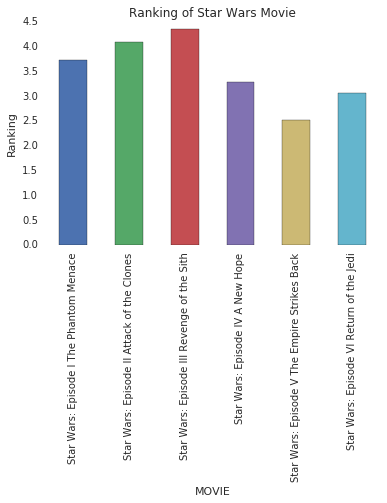

In [18]:
sns.set_style = 'whitegrid'
ax1 = let_see.plot.bar(x = "MOVIE", y = "RANKING", rot = 90, legend = False)
ax1.set_title("Ranking of Star Wars Movie")
ax1.set_ylabel("Ranking")
ax1.set_axis_bgcolor("w")

Looking at the data, we see that Star Wars Episode V was the more favorited sequal of the series whilst Star Wars Episode III was the least favorited. In fact looking at the trend, it appears as though the earlier movies were more well-received than the later sequals. 

# Finding the Most Viewed Movie

In [19]:
round(star_wars[star_wars.columns[3:9]].sum(), 3)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

In [20]:
let_seeII = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'VIEWS': [673, 571, 550, 607, 758, 738]}).copy()

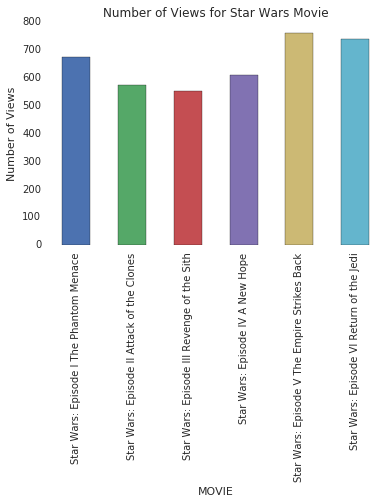

In [21]:
ax2 = let_seeII.plot.bar(x = "MOVIE", y = "VIEWS", legend = False)
ax2.set_axis_bgcolor("w")
ax2.set_ylabel("Number of Views")
ax2.set_title("Number of Views for Star Wars Movie")

Looking at the distribution of the views, it appears that the earlier movies were more viewed than the newer ones. 

# Exploring the Data by Binary Segments

In [22]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [23]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna= False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [24]:
star_wars['Gender'].value_counts(dropna= False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

## (A) Gender

In [25]:
star_wars_males = star_wars[star_wars['Gender'] == 'Male']
star_wars_females = star_wars[star_wars['Gender'] == 'Female']

In [26]:
star_wars_nonbin = star_wars[star_wars['Gender'].isnull()]

In [27]:
star_wars_males.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,4.970000e+02,497,423,497,497,497,497,497,497,423.000000,...,416,423,423,144,497,497,497,415,491,494
unique,NaN,2,2,2,2,2,2,2,2,NaN,...,6,3,2,2,2,1,4,5,5,9
top,NaN,True,True,True,True,True,True,True,True,NaN,...,Very favorably,Han,No,No,No,Male,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,423,303,361,323,317,342,392,387,NaN,...,286,200,279,77,261,497,140,137,151,85
mean,3.290478e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.037825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.113424e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288396e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289745e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290545e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.291028e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
star_wars_females.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,5.490000e+02,549,397,549,549,549,549,549,549,396.000000,...,394,397,397,68,549,549,549,443,545,549
unique,NaN,2,2,2,2,2,2,2,2,NaN,...,6,3,2,2,2,1,4,5,5,9
top,NaN,True,True,True,False,False,False,True,True,NaN,...,Very favorably,I don't understand this question,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,Pacific
freq,NaN,397,238,298,312,327,294,353,338,NaN,...,310,185,329,37,362,549,151,161,177,99
mean,3.289817e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.429293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.306072e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.559796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.288719e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.289902e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290632e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
star_wars_nonbin.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.400000e+02,140,16,140,140,140,140,140,140,16.000000,...,16,8,8,1,22,0.0,0.0,0.0,0.0,0.0
unique,NaN,2,2,2,2,2,2,2,2,NaN,...,3,3,2,1,2,0.0,0.0,0.0,0.0,0.0
top,NaN,True,True,False,False,False,False,False,False,NaN,...,Very favorably,Greedo,No,Yes,No,NaN,NaN,NaN,NaN,NaN
freq,NaN,116,11,126,129,129,130,127,127,NaN,...,9,4,7,1,18,NaN,NaN,NaN,NaN,NaN
mean,3.290106e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.187500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.179132e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.973787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288418e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289559e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290221e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290719e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# MALES ONLY

round(star_wars_males[star_wars_males.columns[9:15]].mean(), 3)

Star Wars: Episode I The Phantom Menace         4.038
Star Wars: Episode II Attack of the Clones      4.225
Star Wars: Episode III Revenge of the Sith      4.275
Star Wars: Episode IV A New Hope                2.998
Star Wars: Episode V The Empire Strikes Back    2.459
Star Wars: Episode VI Return of the Jedi        3.002
dtype: float64

In [31]:
# FEMALES ONLY

round(star_wars_females[star_wars_females.columns[9:15]].mean(), 3)

Star Wars: Episode I The Phantom Menace         3.429
Star Wars: Episode II Attack of the Clones      3.955
Star Wars: Episode III Revenge of the Sith      4.418
Star Wars: Episode IV A New Hope                3.544
Star Wars: Episode V The Empire Strikes Back    2.569
Star Wars: Episode VI Return of the Jedi        3.078
dtype: float64

In [32]:
df_rank_male = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'RANKING': [4.038,4.225,4.275,2.998,2.459,3.002]})

In [33]:
df_rank_female = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'RANKING': [3.429,3.955,4.418,3.544,2.569,3.078]})

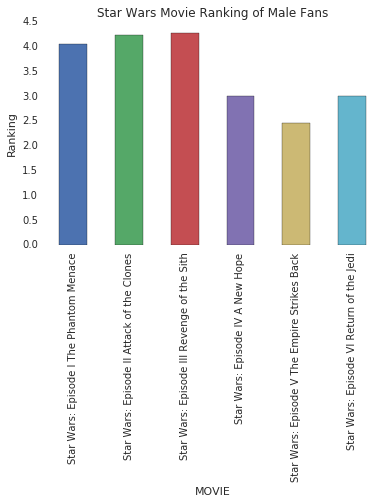

In [41]:
ax3 =  df_rank_male.plot.bar(x = "MOVIE", y = 'RANKING', legend = False)
ax3.set_title("Star Wars Movie Ranking of Male Fans")
ax3.set_ylabel("Ranking")
ax3.set_axis_bgcolor('w')

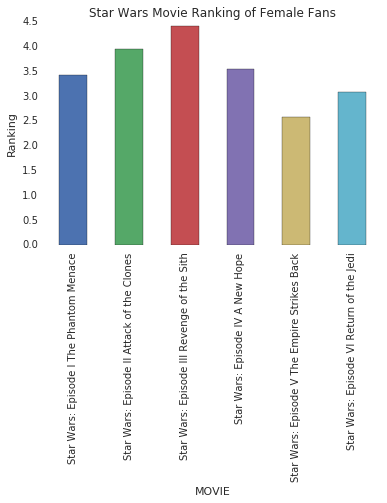

In [38]:
ax4 =  df_rank_female.plot.bar(x = "MOVIE", y = 'RANKING', legend = False)
ax4.set_title("Star Wars Movie Ranking of Female Fans")
ax4.set_ylabel("Ranking")
ax4.set_axis_bgcolor('w')

Looking at the ranking b/t Males and Females, it seems that males have a lower degree of favorability in the newer movies as compared to female fans. Nevertheless, the newer movies were generally poorly received compared to originals. 

In [36]:
round(star_wars_males[star_wars_males.columns[3:9]].sum(), 3)

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [37]:
round(star_wars_females[star_wars_females.columns[3:9]].sum(), 3)

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

In [39]:
df_view_male = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'VIEWS': [361,323,317,342,392,387]})

In [40]:
df_view_female = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'VIEWS': [298,237,222,255,353,338]})

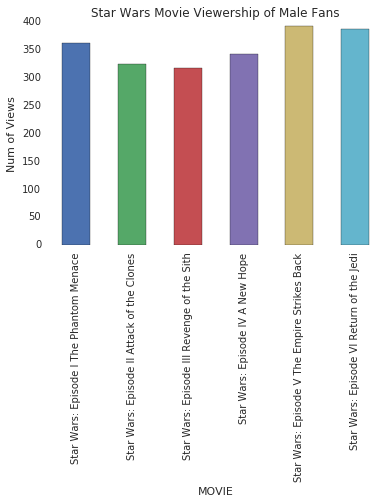

In [42]:
ax5 =  df_view_male.plot.bar(x = "MOVIE", y = 'VIEWS', legend = False)
ax5.set_title("Star Wars Movie Viewership of Male Fans")
ax5.set_ylabel("Num of Views")
ax5.set_axis_bgcolor('w')

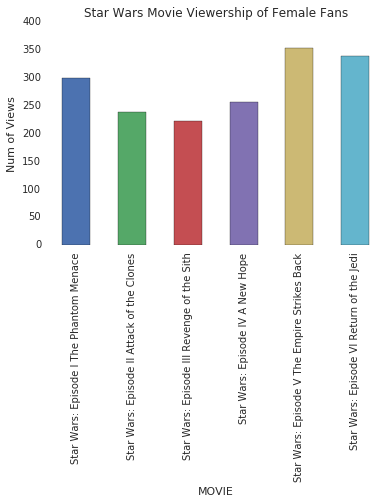

In [43]:
ax6 =  df_view_female.plot.bar(x = "MOVIE", y = 'VIEWS', legend = False)
ax6.set_title("Star Wars Movie Viewership of Female Fans")
ax6.set_ylabel("Num of Views")
ax6.set_axis_bgcolor('w')

In terms of viewership, male fans appear to have had viewed each of the Star Wars movie whilst female fans were more likely to have seen the earlier version than the newer movie. In fact, there is a noted trend of declining viewership with each movie released amongst female audience. 

## (B) Star Wars Fans vs. Casuals

In [44]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [45]:
fan.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,5.520000e+02,552,552,552,552,552,552,552,552,552.000000,...,549,545,545,185,545,541,541,435,539,541
unique,NaN,1,1,2,2,2,2,2,2,NaN,...,6,3,2,2,2,2,4,5,5,9
top,NaN,True,True,True,True,True,True,True,True,NaN,...,Very favorably,Han,No,Yes,Yes,Male,45-60,"$50,000 - $99,999",Bachelor degree,South Atlantic
freq,NaN,552,552,500,463,450,483,538,537,NaN,...,455,268,360,93,370,303,154,156,172,88
mean,3.290214e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.141304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.094407e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289533e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290206e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290856e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
non_fan.describe(include = 'all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Star Wars: Episode I The Phantom Menace,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,2.840000e+02,284,284,284,284,284,284,284,284,283.000000,...,277,283,283,28,283,279,279,240,277,277
unique,NaN,1,1,2,2,2,2,2,2,NaN,...,6,3,2,2,2,2,4,5,4,9
top,NaN,True,False,True,False,False,False,True,True,NaN,...,Very favorably,I don't understand this question,No,No,No,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,NaN,284,284,173,176,184,160,220,201,NaN,...,150,180,255,22,238,159,86,82,90,60
mean,3.290108e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.936396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.053006e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.565197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289391e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290199e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290838e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Fans Only

round(fan[fan.columns[9:15]].mean(), 3)

Star Wars: Episode I The Phantom Menace         4.141
Star Wars: Episode II Attack of the Clones      4.342
Star Wars: Episode III Revenge of the Sith      4.417
Star Wars: Episode IV A New Hope                2.933
Star Wars: Episode V The Empire Strikes Back    2.333
Star Wars: Episode VI Return of the Jedi        2.830
dtype: float64

In [49]:
# Non-Fans Only
round(non_fan[non_fan.columns[9:15]].mean(), 3)

Star Wars: Episode I The Phantom Menace         2.936
Star Wars: Episode II Attack of the Clones      3.592
Star Wars: Episode III Revenge of the Sith      4.194
Star Wars: Episode IV A New Hope                3.933
Star Wars: Episode V The Empire Strikes Back    2.863
Star Wars: Episode VI Return of the Jedi        3.472
dtype: float64

In [50]:
df_rank_fan = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'RANKING': [4.141,4.342,4.417,2.933,2.333,2.830]})

df_rank_nonfan = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'RANKING': [2.936,3.592,4.194,3.933,2.863,3.472]})

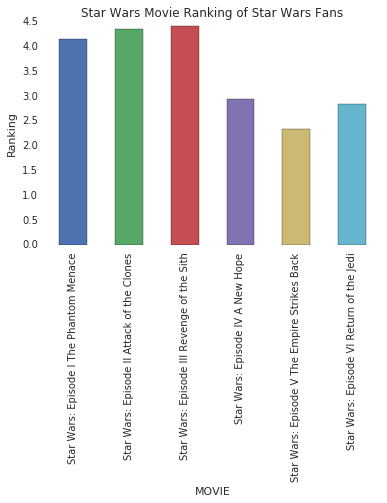

In [51]:
ax7 =  df_rank_fan.plot.bar(x = "MOVIE", y = 'RANKING', legend = False)
ax7.set_title("Star Wars Movie Ranking of Star Wars Fans")
ax7.set_ylabel("Ranking")
ax7.set_axis_bgcolor('w')

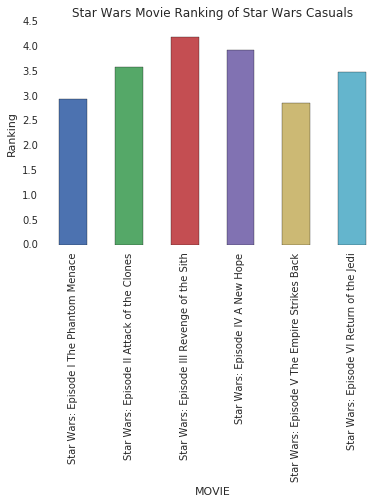

In [52]:
ax8 =  df_rank_nonfan.plot.bar(x = "MOVIE", y = 'RANKING', legend = False)
ax8.set_title("Star Wars Movie Ranking of Star Wars Casuals")
ax8.set_ylabel("Ranking")
ax8.set_axis_bgcolor('w')

Looking at the rankings b/t Star Wars Fans and Casuals, the Fans appear to have held the original trilogy in higher regard than the prequal trilogy compared to that of the casuals that viewed only the Empire Strike Back and Phantom Menace in high regard. 

In [53]:
round(fan[fan.columns[3:9]].sum(), 3)

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

In [54]:
round(non_fan[non_fan.columns[3:9]].sum(), 3)

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

In [55]:
df_view_fan = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'VIEWS': [500,463,450,483,538,537]})

df_view_nonfan = pd.DataFrame({'MOVIE': ["Star Wars: Episode I The Phantom Menace", 
                         "Star Wars: Episode II Attack of the Clones",
                         "Star Wars: Episode III Revenge of the Sith",
                         "Star Wars: Episode IV A New Hope",
                         "Star Wars: Episode V The Empire Strikes Back",
                         "Star Wars: Episode VI Return of the Jedi"], 
                         'VIEWS': [173,108,100,124,220,201]})

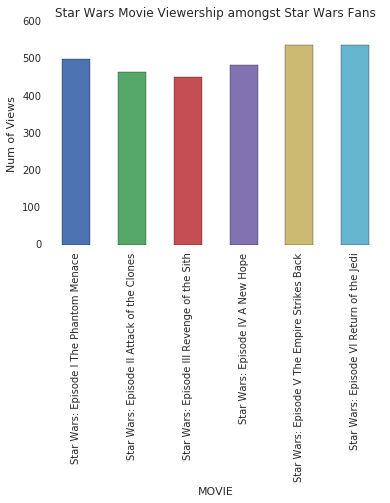

In [56]:
ax9 =  df_view_fan.plot.bar(x = "MOVIE", y = 'VIEWS', legend = False)
ax9.set_title("Star Wars Movie Viewership amongst Star Wars Fans")
ax9.set_ylabel("Num of Views")
ax9.set_axis_bgcolor('w')

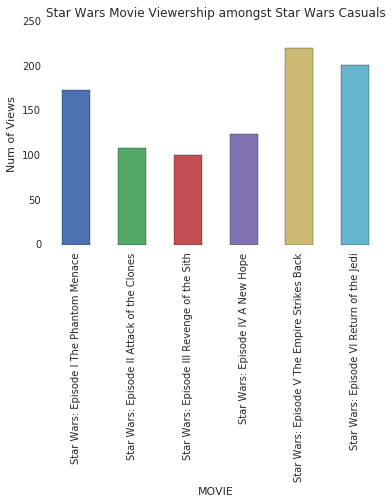

In [58]:
ax10 =  df_view_nonfan.plot.bar(x = "MOVIE", y = 'VIEWS', legend = False)
ax10.set_title("Star Wars Movie Viewership amongst Star Wars Casuals")
ax10.set_ylabel("Num of Views")
ax10.set_axis_bgcolor('w')

Comparing between movies, the Star Wars Fans all seem to have at least watched every movie whilst the casuals appeared to have disproportinately viewed either the later parts of the original trilogy or the Phantom Menace. 